In [1]:
import os
os.chdir('/content/drive/MyDrive/EN0522')  # Colab 換路徑使用

import openpyxl
wb = openpyxl.load_workbook('DATA_Kiss_count_gender_and_IQ.xlsx')     # 開啟 Excel 檔案

names = wb.sheetnames    # 讀取 Excel 裡所有工作表名稱
s1 = wb['Data']        # 取得工作表名稱為「DATA」的內容
print(names)
# 印出 title ( 工作表名稱 )、max_row 最大列數、max_column 最大行數
print(s1.title, s1.max_row, s1.max_column)

['Data']
Data 1000 26


In [2]:
import pandas as pd
import numpy as np

# 讀取 Excel 檔案（假設檔名為 data.xlsx，資料在第一個 sheet）
df = pd.read_excel('DATA_Kiss_count_gender_and_IQ.xlsx')

# 讀取其中2-6欄
data = df.iloc[:, 2:6].dropna().to_numpy()  # 去掉空值並轉成 numpy array

# 確保資料數量是4的倍數（如不是可視情況補0或裁切）
remainder = len(data) % 4
if remainder != 0:
    data = np.append(data, [0] * (4 - remainder))  # 補 0

# 重塑成 n 行 4 列
reshaped = data.reshape(-1, 4)

# 顯示結果
print(reshaped)

[[134  18  15   1]
 [139   9  22   1]
 [107   6  18   1]
 [131  17  18   1]
 [117  11  18   1]
 [ 89   7  22   1]
 [112  16  14   1]
 [110  14  18   1]
 [130  11  17   1]
 [134  11  21   1]
 [138  15  24   1]
 [133  16  14   1]
 [118   7  17   1]
 [ 85  10  15   1]
 [ 90   3  15   1]
 [100   9  23   1]
 [107   7  22   1]
 [ 89   4  20   1]
 [114   8  15   1]
 [136  13  14   1]
 [120  13  15   1]
 [121  18  14   1]
 [122  16  16   1]
 [131   9  19   1]
 [110  11  17   1]
 [ 92   3  19   1]
 [ 98   3  22   1]
 [ 95   9  17   1]
 [124  17  14   1]
 [ 99   4  21   1]
 [105  14  20   1]
 [125  12  19   1]
 [138  18  20   1]
 [118  11  15   1]
 [126  12  21   1]
 [121  12  20   1]
 [120  18  19   1]
 [ 87   1  18   1]
 [ 86   9  22   1]
 [116  16  24   1]
 [ 90  11  23   1]
 [116   8  15   1]
 [131  18  24   1]
 [108   8  22   1]
 [138  12  14   1]
 [102  13  23   1]
 [135  13  18   1]
 [ 98   2  21   1]
 [136  16  20   1]
 [131  18  14   1]
 [103   6  20   1]
 [ 85   5  21   1]
 [ 92  10  1

In [3]:
import pandas as pd
from scipy import stats
import numpy as np

# 讀取 Excel
df = pd.read_excel('DATA_Kiss_count_gender_and_IQ.xlsx')

# 假設你要用第3~6欄
data = df.iloc[:, 2:6]  # 第3~6欄

# 對每一對變數組合計算 r、t、p
columns = data.columns
n = len(data.dropna())  # 有效樣本數

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        x = data.iloc[:, i]
        y = data.iloc[:, j]

        # 去除 NaN
        valid = x.notna() & y.notna()
        x = x[valid]
        y = y[valid]

        # 計算皮爾森相關係數與 p 值
        r, p = stats.pearsonr(x, y)

        # 計算 t 值：t = r * sqrt((n - 2) / (1 - r^2))
        t = r * np.sqrt((len(x) - 2) / (1 - r**2))

        print(f"{columns[i]} vs {columns[j]}: r = {r:.4f}, t = {t:.4f}, p = {p:.4g}")

IQ vs Kiss Count: r = 0.1108, t = 1.5689, p = 0.1183
IQ vs Age of First Kiss: r = -0.0418, t = -0.5893, p = 0.5563
IQ vs Gender.1: r = 0.1282, t = 1.8191, p = 0.0704
Kiss Count vs Age of First Kiss: r = -0.2308, t = -3.3372, p = 0.001011
Kiss Count vs Gender.1: r = -0.0035, t = -0.0487, p = 0.9612
Age of First Kiss vs Gender.1: r = -0.1940, t = -2.7831, p = 0.005906


<ipython-input-4-8dc6a7f6a169>:32: RuntimeWarning: divide by zero encountered in scalar divide
  t = r * np.sqrt((len(x) - 2) / (1 - r**2))


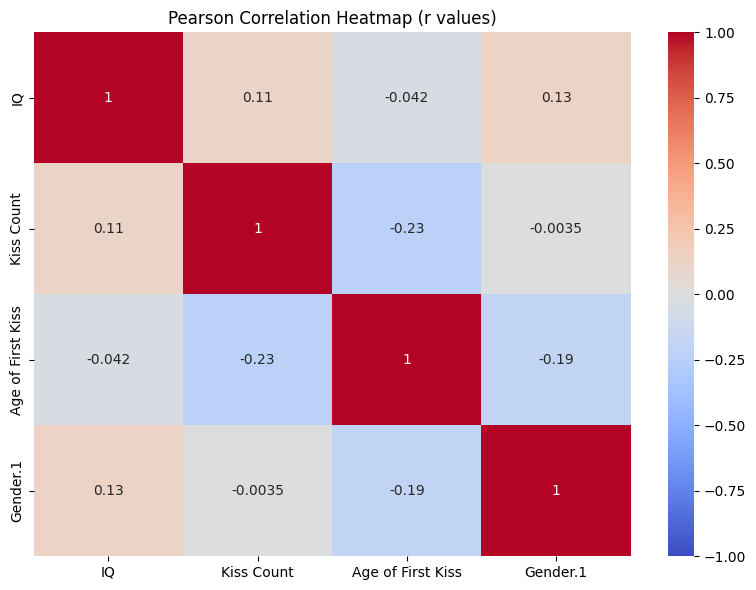

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 讀取 Excel
df = pd.read_excel('DATA_Kiss_count_gender_and_IQ.xlsx')

# 取第3到第6欄（Python 是從 0 開始，所以是 index 2:6）
data = df.iloc[:, 2:6]

# ==== 🔢 計算 r, t, p 值 ====

# 建立儲存表
r_matrix = data.corr(method='pearson')  # r 值
columns = data.columns
t_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)
p_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)

# 計算每對變數的 r, t, p 值
for i in range(len(columns)):
    for j in range(len(columns)):
        x = data.iloc[:, i]
        y = data.iloc[:, j]
        valid = x.notna() & y.notna()
        x = x[valid]
        y = y[valid]

        if len(x) > 2:
            r, p = stats.pearsonr(x, y)
            t = r * np.sqrt((len(x) - 2) / (1 - r**2))
            r_matrix.iloc[i, j] = r
            t_matrix.iloc[i, j] = t
            p_matrix.iloc[i, j] = p

# ==== 🔥 畫出相關係數熱力圖 ====
plt.figure(figsize=(8, 6))
sns.heatmap(r_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap (r values)')
plt.tight_layout()
plt.show()

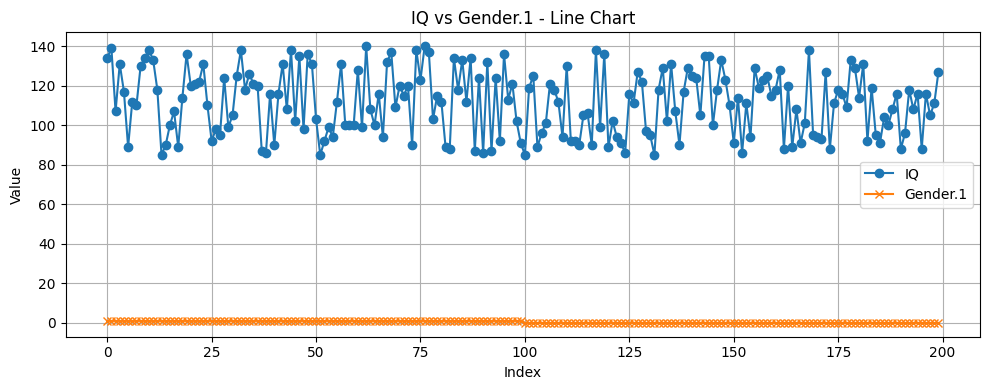

In [5]:
# ==== 📈 畫出折線圖====
col1 = columns[0]  # 第3欄
col2 = columns[3]  # 第6欄

plt.figure(figsize=(10, 4))
plt.plot(data[col1], label=col1, marker='o')
plt.plot(data[col2], label=col2, marker='x')
plt.title(f'{col1} vs {col2} - Line Chart')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

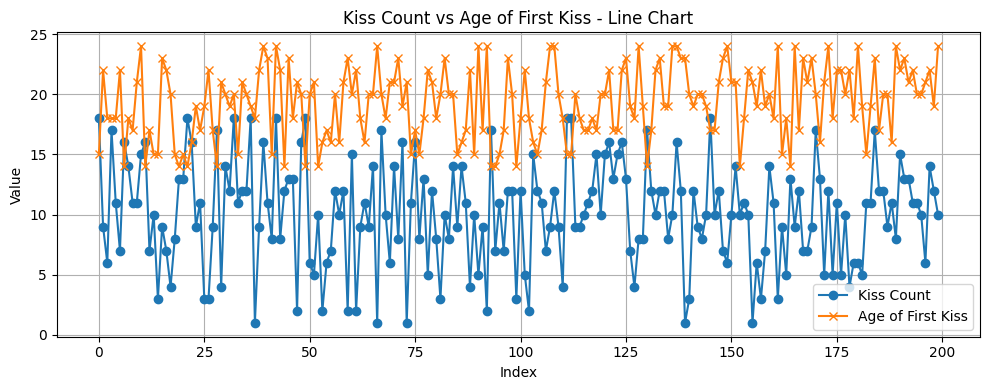

In [6]:
# ==== 📈 畫出折線圖====
col1 = columns[1]  # 第4欄
col2 = columns[2]  # 第5欄

plt.figure(figsize=(10, 4))
plt.plot(data[col1], label=col1, marker='o')
plt.plot(data[col2], label=col2, marker='x')
plt.title(f'{col1} vs {col2} - Line Chart')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()